In [1]:
import xarray as xr
import numpy as np
import tools
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from datetime import datetime 
from datetime import timedelta

import scipy.interpolate as interp

scrip.so not found. Remapping function will not be available


# Assessment of the OSSE simulations

An assesment of the OSSE simulations will be done here. We will try to perform it in a analogue way to the one done for the OSE, where real observations were used for assimilation and assesment.

- SLA: The value of the NR at the position of the regular satellite tracks will be extracted and compared to the simulations.
    
- SST: The NR surface temperature field will be considered and subsampled, reducing the resolution to 10 km by picking one of every four observations both in vertical and horizontal.
    
- ARGO: Temperature and salinity profiles at position of the buoys during the experiment will be extracted from NR and simulations and compared
    
- TS profiles will algo be assesed in areas of the domain distant from assimialt4ed observations. This way, the capabilities of the model will also be assesed.

- HFR: The data samples taken apart for validation will be used for this purpose

## HFR

#### Load Observations



In [2]:
obs_path = '/DATA/jhernandez/WMOP_ASSIM/Observations/HFR_OSSE/hfr_validation_2/'
obsfile = glob(obs_path + '*HFR*future_val*')   # virtual Obs
obsfile.sort()

### Calcualte RMSD

For each of the different experiments the RMSD is calculated for every day of simulation, interpolating the SLA field to the postion of the observations. The positions will be considered the same all along the experiment

In [69]:
import scipy.interpolate as interp
import skill_metrics as sm
from skill_metrics import centered_rms_dev as crmsd
from skill_metrics import bias

# Define initial and end date
date = datetime(2014,9,21)
date_end = datetime(2014,10,19)

# Experiment names from which to extract equivalents to observations and to calculate RMSD
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 
             'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']

# number of days of simulation
ndays = (date_end - date).days


# Initialize empty dictionary and arrays
rmsd_u = {};  rmsd_v = {}
bias_u = {};  bias_v = {}
crmsd_u = {}; crmsd_v = {}

u_obs_total = {}  # array containing all observations (concatenate each day obs)
u_wmop_total = {}  # array containing all wmop obs
v_obs_total = {}  # array containing all observations (concatenate each day obs)
v_wmop_total = {}  # array containing all wmop obs

for exp in exp_names:
    
    rmsd_u[exp] = np.empty(ndays);    rmsd_v[exp] = np.empty(ndays);    
    bias_u[exp] = np.empty(ndays);    bias_v[exp] = np.empty(ndays);
    crmsd_u[exp] = np.empty(ndays);   crmsd_v[exp] = np.empty(ndays);
    
    u_obs_total[exp] = np.array([])
    u_wmop_total[exp] = np.array([])
    v_obs_total[exp] = np.array([])
    v_wmop_total[exp] = np.array([])

    
    
# Loop over days
for i in range(ndays):
    
    strdate = date.strftime('%Y%m%d')  
    obsfile = '/DATA/jhernandez/WMOP_ASSIM/Observations/HFR_OSSE/hfr_validation_2/assim_obs_HFR_future_validation_{0}.obs'.format(strdate)
    df_val = tools.read_obsfile(obsfile)
    
    df_u = df_val[df_val['var']=='u'].reset_index(drop=True)
    df_v = df_val[df_val['var']=='v'].reset_index(drop=True)
    
    
    # Loop over different simulations
    for exp in exp_names: 

        if exp in ['NOASSIM']:
            path_wmop = '/home/modelling/data/workdir_2/HFR_DA/HFR_{0}_Oct2014'.format(exp)
        else:
            path_wmop = '/DATA/jhernandez/ROMS/Outputs/HFR_{0}_Oct2014_OSSE/'.format(exp)
            

        file_wmop = '{0}/roms_WMOP_ASSIM_{1}_avg.nc'.format(path_wmop, strdate)
        ds_wmop = xr.open_dataset(file_wmop)
        
      
        # Interpolate WMOP U
        u = ds_wmop.u[0,-1,:,:].values 
        u[np.isnan(u)] = 10000
        fu = interp.interp2d(ds_wmop.lon_u[1,:].values, ds_wmop.lat_u[:,1].values, u, kind='linear')

        u_interp = [fu(df_u.iloc[i].lon, df_u.iloc[i].lat)[0] for i in range(len(df_u))]
        u_interp = np.array(u_interp)
        u_interp[u_interp>1] = np.nan

        # Interpolate WMOP V
        v = ds_wmop.v[0,-1,:,:].values 
        v[np.isnan(v)] = 10000
        fv = interp.interp2d(ds_wmop.lon_v[1,:].values, ds_wmop.lat_v[:,1].values, v, kind='linear')

        v_interp = [fv(df_v.iloc[i].lon, df_v.iloc[i].lat)[0] for i in range(len(df_v))]
        v_interp = np.array(v_interp)
        v_interp[v_interp>1] = np.nan
        
        # Compute RMSD
        rmsd_u[exp][i] = sm.rmsd(u_interp, df_u.val.values)
        rmsd_v[exp][i] = sm.rmsd(v_interp, df_v.val.values)
        
        # Compute BIAS
        bias_u[exp][i] = bias(u_interp, df_u.val.values)
        bias_v[exp][i] = bias(v_interp, df_v.val.values)
        
        # Compute CRMSD
        crmsd_u[exp][i] = crmsd(u_interp, df_u.val.values)
        crmsd_v[exp][i] = crmsd(v_interp, df_v.val.values)
        
        u_obs_total[exp] = np.concatenate((u_obs_total[exp], df_u.val.values))
        u_wmop_total[exp] = np.concatenate((u_wmop_total[exp], u_interp))
        v_obs_total[exp] = np.concatenate((v_obs_total[exp], df_v.val.values))
        v_wmop_total[exp] = np.concatenate((v_wmop_total[exp], v_interp))
        
       # print(rmsd[exp][i])
    
    #print('')
    date = date + timedelta(days=1)
    

    #print(strdate)
print('done')

done


## Plot Observation used to validate



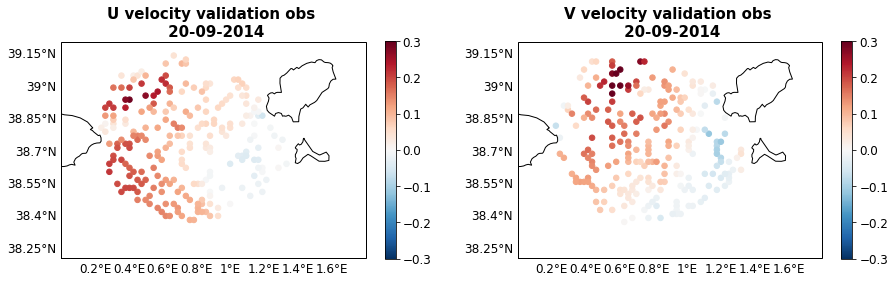

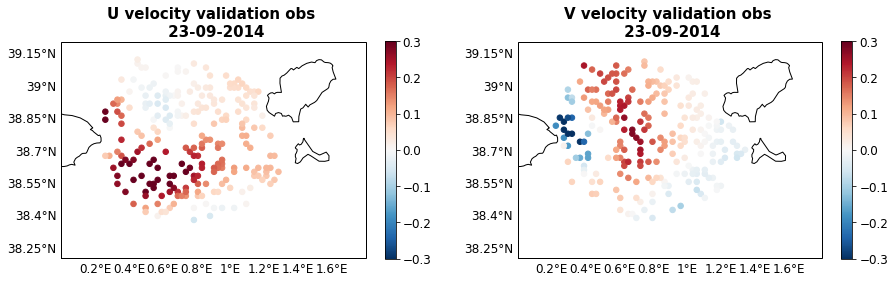

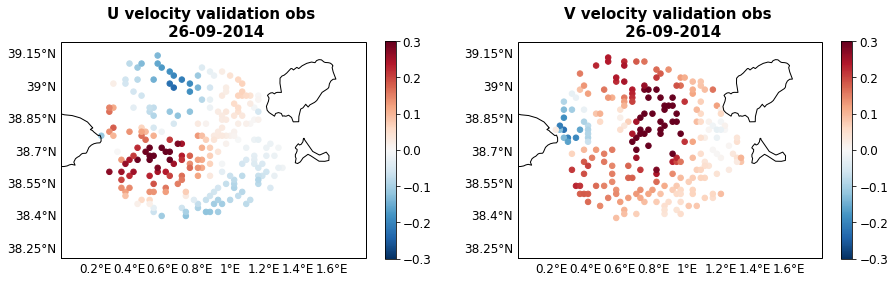

In [40]:
import scipy.interpolate as interp
import skill_metrics as sm

# Define initial and end date
date = datetime(2014,9,20)
date_end = datetime(2014,10,19)

    
# Loop over days
for i in range(3):
    
    strdate = date.strftime('%Y%m%d')  
    obsfile = '/DATA/jhernandez/WMOP_ASSIM/Observations/HFR_OSSE/hfr_validation_2/assim_obs_HFR_future_validation_{0}.obs'.format(strdate)
    #obsfile = '/DATA/jhernandez/WMOP_ASSIM/Observations/HFR_OSSE/assim_obs_HFR_future_{0}.obs'.format(strdate)
    df_val = tools.read_obsfile(obsfile)
    
    df_u = df_val[df_val['var']=='u'].reset_index(drop=True)
    df_v = df_val[df_val['var']=='v'].reset_index(drop=True)
    
    fig_obs = plt.figure(figsize=(15,4))
    
    ax, gl = tools.make_map(continents=False, limits=[0, 1.8, 38.2, 39.2], subplot_dim=121)
    plt.scatter(df_u.lon, df_u.lat, 30, df_u.val, transform=gl.crs, vmin=-0.3, vmax=0.3, cmap='RdBu_r')
    plt.colorbar()
    plt.title('U velocity validation obs \n {0}'.format(date.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
    
    ax, gl = tools.make_map(continents=False, limits=[0, 1.8, 38.2, 39.2], subplot_dim=122)
    plt.scatter(df_v.lon, df_v.lat, 30, df_v.val, transform=gl.crs, vmin=-0.3, vmax=0.3, cmap='RdBu_r')
    plt.colorbar()
    plt.title('V velocity validation obs \n {0}'.format(date.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')
   
    plt.show()
    
    date = date + timedelta(days=3)

In [41]:
#fig_obs.savefig('/home/jhernandez/Escritorio/hfr_validation_observations_OSSE.png', dpi=250)

## Plot RMSD evolution along the simulation period

RMSD has been calculated every day for each Velocity component (U and V) between the Validation dataset extracted from the NR and the WMOP. 
The model data assimilative simulations daily mean fields have been interpolated to observation points

#### Create Datetick

In [42]:
t0 = datetime(2014,9,21)
t = [t0 + timedelta(days=i) for i in range(31)]
xt = range(0,31,3)
tt = [time.strftime('%d/%m/%Y') for time in t]

#### Select font preferences

In [138]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

#### Plot. Subset for plotting desired experiments

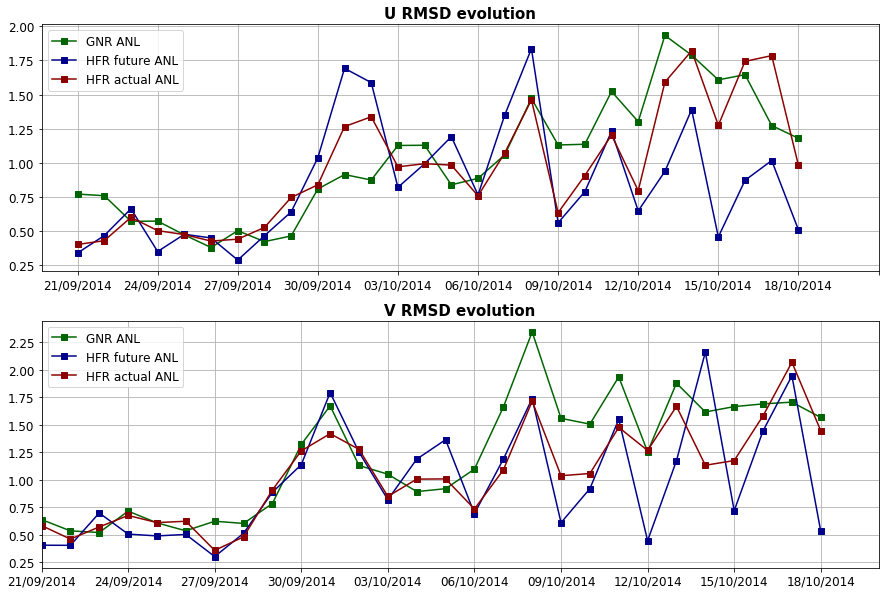

In [139]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['m', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
subset = [1,3,5]
subset = [2,4,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]

fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for ii, exp in enumerate(exp_names):
    
    ax1.plot(rmsd_u[exp] / rmsd_u['NOASSIM'], marker='s', linestyle='-', color=colors[ii])
    ax2.plot(rmsd_v[exp] / rmsd_u['NOASSIM'], marker='s', linestyle='-', color=colors[ii])
    #ax1.plot(rmsd_u[exp], marker='s', linestyle='-', color=colors[ii])
    #ax2.plot(rmsd_v[exp], marker='s', linestyle='-', color=colors[ii])
ax1.legend(labels)
ax1.grid(True)
ax1.set_xticks(ticks=list(xt))
ax1.set_xticklabels(labels=tt[0:-1:3])

ax2.legend(labels)
ax2.grid(True)
ax2.set_xticks(ticks=list(xt))
ax2.set_xticklabels(labels=tt[0:-1:3])
plt.xlim((0,29))

ax1.set_title('U RMSD evolution', fontsize=15, fontweight='bold')
ax2.set_title('V RMSD evolution', fontsize=15, fontweight='bold')

plt.show()

In [140]:
fig.savefig('/home/jhernandez/Escritorio/OSSE/rmsd_evolution_Velocities_OSSE_anl.png', dpi=250)

In [141]:
for exp in exp_names:
    
    print(exp)
    print(np.mean(rmsd_u[exp], axis=0)/ np.mean(rmsd_u['NOASSIM'], axis=0))
    print('')

generic_nonudging
0.8892673044212486

all_future_nonudging
0.775454755779042

all_actual_nonudging
0.8466781219561862



In [27]:
for exp in exp_names:
    
    print(exp)
    print(np.mean(rmsd_u[exp], axis=0)/ np.mean(rmsd_u['NOASSIM'], axis=0))
    print('')

generic_nonudging
0.8892673044212486

all_future_nonudging
0.775454755779042

all_actual_nonudging
0.8466781219561862



## PLOT BIAS and CRMSD

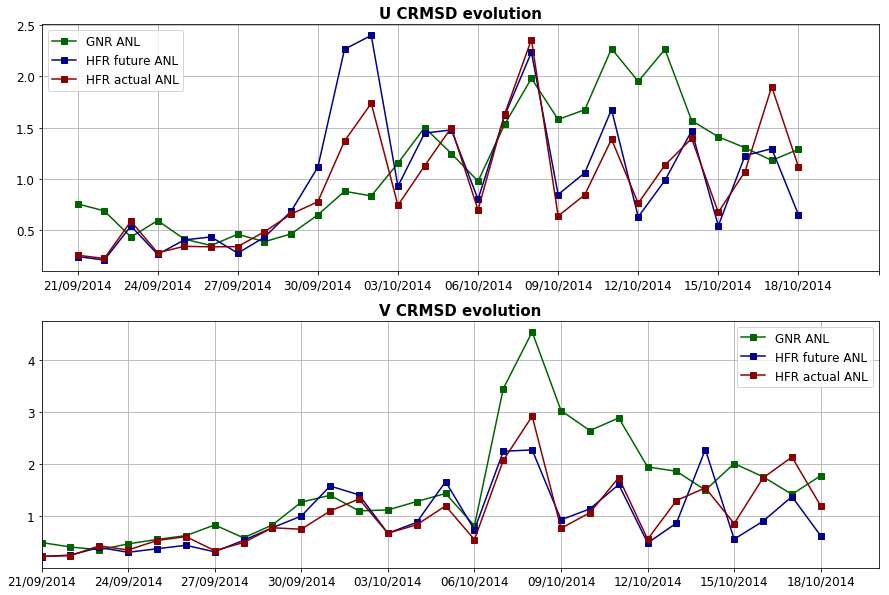

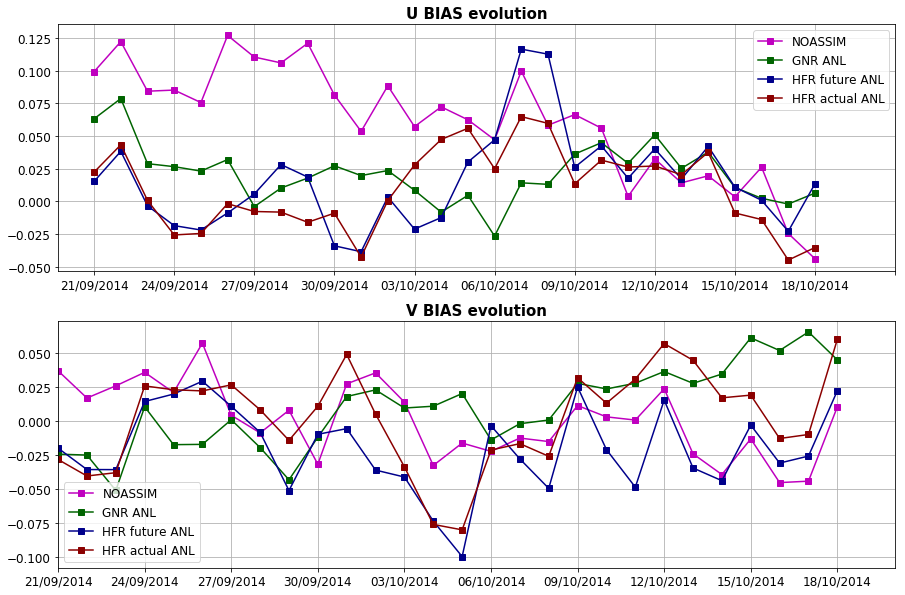

In [46]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['m', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
#subset = [1,3,5]
subset = [0,2,4,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


## PLOT  CRMSD 

fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for ii, exp in enumerate(exp_names[1:]):
    
    ax1.plot(crmsd_u[exp] / crmsd_u['NOASSIM'], marker='s', linestyle='-', color=colors[ii+1])
    ax2.plot(crmsd_v[exp] / crmsd_u['NOASSIM'], marker='s', linestyle='-', color=colors[ii+1])
    #ax1.plot(rmsd_u[exp], marker='s', linestyle='-', color=colors[ii])
    #ax2.plot(rmsd_v[exp], marker='s', linestyle='-', color=colors[ii])
    
ax1.legend(labels[1:]);  ax1.grid(True);  ax1.set_xticks(ticks=list(xt));  ax1.set_xticklabels(labels=tt[0:-1:3])
ax2.legend(labels[1:]);  ax2.grid(True);  ax2.set_xticks(ticks=list(xt));  ax2.set_xticklabels(labels=tt[0:-1:3])
plt.xlim((0,29))

ax1.set_title('U CRMSD evolution', fontsize=15, fontweight='bold')
ax2.set_title('V CRMSD evolution', fontsize=15, fontweight='bold')


## PLOT BIAS

fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for ii, exp in enumerate(exp_names):
    
    ax1.plot(bias_u[exp], marker='s', linestyle='-', color=colors[ii])
    ax2.plot(bias_v[exp], marker='s', linestyle='-', color=colors[ii])
    
    #ax1.plot(rmsd_u[exp], marker='s', linestyle='-', color=colors[ii])
    #ax2.plot(rmsd_v[exp], marker='s', linestyle='-', color=colors[ii])
    
ax1.legend(labels);  ax1.grid(True); ax1.set_xticks(ticks=list(xt)); ax1.set_xticklabels(labels=tt[0:-1:3])
ax2.legend(labels);  ax2.grid(True); ax2.set_xticks(ticks=list(xt)); ax2.set_xticklabels(labels=tt[0:-1:3])
plt.xlim((0,29))

ax1.set_title('U BIAS evolution', fontsize=15, fontweight='bold')
ax2.set_title('V BIAS evolution', fontsize=15, fontweight='bold')


plt.show()

## Taylor Diagram

In [126]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['CR', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['black', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
#subset = [1,3,5]
subset = [0,2,4,6]
#subset = [0,1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in exp_names:
    taylor_stats[e] = sm.taylor_statistics(u_wmop_total[e], u_obs_total[e])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

In [127]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

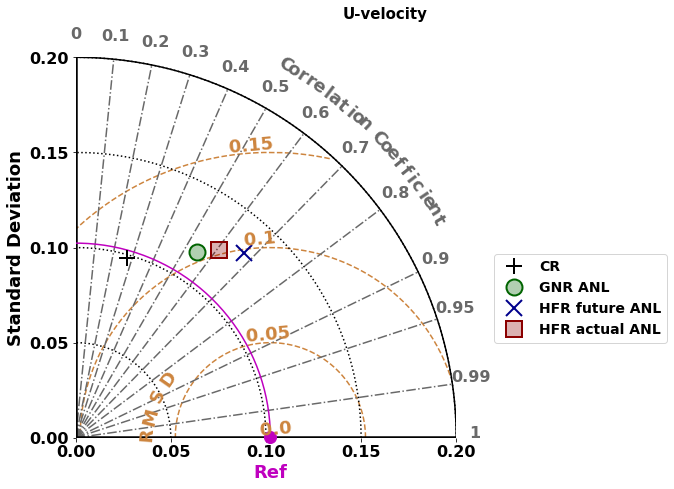

In [128]:
label = ['HFR'] + labels

fig_taylor_u = plt.figure(num=1, figsize=(12,7))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', markerDisplayed = 'marker',
                      markerLegend = 'on', markercolor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16, tickRMS = [0.0, 0.05, 0.1, 0.15], 
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 95, showlabelsRMS = 'on', axismax=0.2,
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.3)#, overlay=True)

plt.suptitle('U-velocity', fontsize=15, fontweight='bold')
plt.show()

In [99]:
crmsd / crmsd[4]

array([0.        , 1.18034501, 1.02685098, 0.95960534, 1.        ])

In [129]:
fig_taylor_u.savefig('/home/jhernandez/Escritorio/OSSE/taylor_diagram_U_OSSE_anl.png', dpi=250)

## V-velocity

In [133]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['CR', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['black', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
#subset = [1,3,5]
subset = [0,2,4,6]
#subset = [0,1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]

sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in exp_names:
    taylor_stats[e] = sm.taylor_statistics(v_wmop_total[e], v_obs_total[e])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

In [134]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

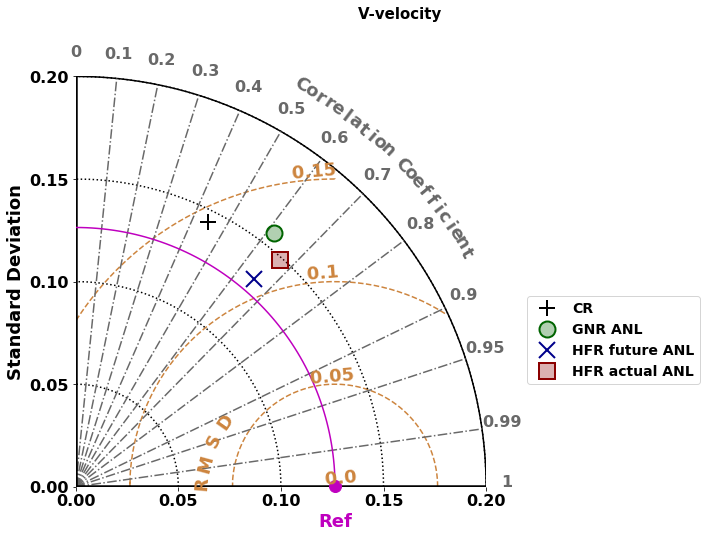

In [135]:
label = ['HFR'] + labels

fig_taylor_v = plt.figure(num=1, figsize=(12,8))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', markerDisplayed = 'marker',
                      markerLegend = 'on', markercolor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16, tickRMS = [0.0, 0.05, 0.1, 0.15], 
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 95, showlabelsRMS = 'on', axismax=0.2,
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.3)#, overlay=True)

plt.suptitle('V-velocity', fontsize=15, fontweight='bold')
plt.show()

In [136]:
fig_taylor_v.savefig('/home/jhernandez/Escritorio/OSSE/taylor_diagram_V_OSSE_anl.png', dpi=250)

In [103]:
crmsd / crmsd[4]

array([0.        , 1.25785834, 1.1188078 , 0.9553685 , 1.        ])